# Positive alpha mutual funds

## IMPORTANT NOTE
Whenever I write positive or negative below and smth after, I always mean positive or negative alpha.

In [1]:
from tools import get_mutual_fund_data, get_bond_data, get_ff_data, get_index_data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from data_tools import capm, ff_3, ff_5, reg_date_range, capm_index, corr_index

mf_dict = get_mutual_fund_data()
ff_df = get_ff_data()
bond_df = get_bond_data()
index_dict = get_index_data()

mf_types = list(mf_dict.keys())
us_eq_data = {k[2]:[] for k in mf_dict.keys() if 'US Equity' in k}

for mf_key, mf_val in mf_dict.items():
    if mf_key[2] in us_eq_data.keys():
        us_eq_data[mf_key[2]].append(mf_val)

for idx, val in enumerate(us_eq_data['Mid-Cap Growth']):
    if val['ticker'].iloc[0] == 'DEEVX':
        del us_eq_data['Mid-Cap Growth'][idx]

us_eq_alphas_c = []
us_eq_alphas_std_c = []
us_eq_betas_c = []
for strat in us_eq_data.keys():
    temp_alpha=[]
    temp_beta=[]
    for ticker in us_eq_data[strat]:
        result = capm(ticker, ff_df)
        if result == None:
            continue
        temp_alpha.append(result['const'])
        temp_beta.append(result['Mkt-RF'])
    us_eq_alphas_c.append(np.mean(temp_alpha))
    us_eq_alphas_std_c.append(np.std(temp_alpha))
    us_eq_betas_c.append(np.mean(temp_beta))

us_index = {k[2]: v for k, v in index_dict.items() if 'US Equity' in k}

us_idx_alphas_c = []
us_idx_betas_c = []
us_idx_alphas_std_c = []
for strat in us_eq_data.keys():
    temp_alpha=[]
    temp_beta=[]
    for ticker in us_eq_data[strat]:
        start_date = ff_df['date'][0] if ff_df['date'][0] > ticker['date'][1] else ticker['date'][1]
        start_date = start_date if start_date > us_index[strat]['Date'][1] else us_index[strat]['Date'][1]
        end_date = ticker['date'].iloc[-1]
        result = capm_index(ticker, ff_df, us_index[strat], start_date, end_date)
        if result == None:
            continue
        temp_alpha.append(result['const'])
        temp_beta.append(result['beta'])
    us_idx_alphas_c.append(np.mean(temp_alpha))
    us_idx_betas_c.append(np.mean(temp_beta))
    us_idx_alphas_std_c.append(np.std(temp_alpha))

ind_alphas_c = []
ind_betas_c = []
fund_tickers = []

for strat in us_eq_data.keys():
    temp_alpha=[]
    temp_beta=[]
    temp_tickers = []
    for ticker in us_eq_data[strat]:
        result = capm(ticker, ff_df)
        if result == None:
            continue
        temp_alpha.append(result['const'])
        temp_beta.append(result['Mkt-RF'])
        temp_tickers.append(ticker['ticker'].iloc[0])
    ind_alphas_c.append(temp_alpha)
    ind_betas_c.append(temp_beta)
    fund_tickers.append(temp_tickers)

ind_idx_alphas_c = []
ind_idx_betas_c = []
fund_tickers_idx = []
ind_corr = []
for strat in us_eq_data.keys():
    temp_alpha=[]
    temp_beta=[]
    temp_tickers=[]
    temp_corr=[]
    for ticker in us_eq_data[strat]:
        start_date = ff_df['date'][0] if ff_df['date'][0] > ticker['date'][1] else ticker['date'][1]
        start_date = start_date if start_date > us_index[strat]['Date'][1] else us_index[strat]['Date'][1]
        end_date = ticker['date'].iloc[-1]
        result = capm_index(ticker, ff_df, us_index[strat], start_date, end_date)
        if result == None:
            continue
        temp_alpha.append(result['const'])
        temp_beta.append(result['beta'])
        temp_tickers.append(ticker['ticker'].iloc[0])
        temp_corr.append(corr_index(ticker, us_index[strat], start_date, end_date))
    ind_idx_alphas_c.append(temp_alpha)
    ind_idx_betas_c.append(temp_beta)
    fund_tickers_idx.append(temp_tickers)
    ind_corr.append(temp_corr)


ind_alphas_5 = []
ind_betas_5 = []
ind_smbs_5 = []
ind_hmls_5 = []
ind_rmws_5 = []
ind_cmas_5 = []
for strat in us_eq_data.keys():
    temp_alpha=[]
    temp_beta=[]
    temp_smb = []
    temp_hml = []
    temp_rmw = []
    temp_cma = []
    for ticker in us_eq_data[strat]:
        start_date = ff_df['date'][0] if ff_df['date'][0] > ticker['date'][1] else ticker['date'][1]
        end_date = ticker['date'].iloc[-1]
        result = reg_date_range(ticker, ff_df, ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA'], start_date, end_date)
        if result == None:
            continue
        temp_alpha.append(result['const'])
        temp_beta.append(result['Mkt-RF'])
        temp_smb.append(result['SMB'])
        temp_hml.append(result['HML'])
        temp_rmw.append(result['RMW'])
        temp_cma.append(result['CMA'])
    ind_alphas_5.append(temp_alpha)
    ind_betas_5.append(temp_beta)
    ind_smbs_5.append(temp_smb)
    ind_hmls_5.append(temp_hml)
    ind_rmws_5.append(temp_rmw)
    ind_cmas_5.append(temp_cma)

Total number of categories 20
Total number of funds: 1698

Mutual Fund Data


c:\Users\dklro\Documents\Fall 2023\15.433\15-4331-final-project\tools.py:129: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/mutual_funds/mutual_fund_data.csv",skiprows=0).dropna(how='any')


Total number of rows: 408031
Total number of funds with enough data: 1608
Funds with no data: 25
Funds with less than 5 years of data: 65
Columns: Index(['ticker', 'date', 'total_net_assets', 'total_returns',
       'net_asset_value', 'nav_return'],
      dtype='object')

Mutual Fund Data


c:\Users\dklro\Documents\Fall 2023\15.433\15-4331-final-project\tools.py:129: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/mutual_funds/mutual_fund_data.csv",skiprows=0).dropna(how='any')


Total number of rows: 408031
Total number of funds with enough data: 1608
Funds with no data: 25
Funds with less than 5 years of data: 65
Columns: Index(['ticker', 'date', 'total_net_assets', 'total_returns',
       'net_asset_value', 'nav_return'],
      dtype='object')

FF Data
          date  Mkt-RF   SMB   HML   RMW   CMA    RF
0   1963-07-31   -0.39 -0.41 -0.97  0.68 -1.18  0.27
1   1963-08-31    5.07 -0.80  1.80  0.36 -0.35  0.25
2   1963-09-30   -1.57 -0.52  0.13 -0.71  0.29  0.27
3   1963-10-31    2.53 -1.39 -0.10  2.80 -2.01  0.29
4   1963-11-30   -0.85 -0.88  1.75 -0.51  2.24  0.27
..         ...     ...   ...   ...   ...   ...   ...
719 2023-06-30    6.46  1.34 -0.26  2.18 -1.62  0.40
720 2023-07-31    3.21  2.86  4.11 -0.57  0.57  0.45
721 2023-08-31   -2.39 -3.65 -1.06  3.43 -2.37  0.45
722 2023-09-30   -5.24 -1.80  1.52  1.86 -0.83  0.43
723 2023-10-31   -3.18 -4.03  0.19  2.47 -0.66  0.47

[724 rows x 7 columns]

Bond Data
Columns: Index(['date', '30 Year Bond Return', '

In [2]:
dict_pos_c_idx = {}
dict_pos_c = {}
dict_pos_bench_idx = {}
dict_pos_bench = {}
dict_pos_5_idx = {}
dict_pos_5 = {}

num_to_name = {
    0: 'Large Value',
    1: 'Large Blend',
    2: 'Large Growth',
    3: 'Mid-Cap Value',
    4: 'Mid-Cap Blend',
    5: 'Mid-Cap Growth',
    6: 'Small Value',
    7: 'Small Blend',
    8: 'Small Growth'
}

name_to_num = {
    'Large Value': 0,
    'Large Blend': 1,
    'Large Growth': 2,
    'Mid-Cap Value': 3,
    'Mid-Cap Blend': 4,
    'Mid-Cap Growth': 5,
    'Small Value': 6,
    'Small Blend': 7,
    'Small Growth': 8
}

pos_c_data = []
pos_bench_data = []
pos_5_data = []
neg_c_data = []
neg_bench_data = []
neg_5_data = []

for j in range(9):
    pos_c_idx = [idx for idx, val in enumerate(ind_alphas_c[j]) if val > 0]
    pos_c = [fund_tickers[j][i] for i in pos_c_idx]
    dict_pos_c_idx[num_to_name[j]] = pos_c_idx
    dict_pos_c[num_to_name[j]] = pos_c
    for mf in us_eq_data[num_to_name[j]]:
        if mf['ticker'].iloc[0] in pos_c:
            pos_c_data.append(mf) 
        else:
            neg_c_data.append(mf)

    pos_bench_idx = [idx for idx, val in enumerate(ind_idx_alphas_c[j]) if val > 0]
    pos_bench = [fund_tickers_idx[j][i] for i in pos_bench_idx]
    dict_pos_bench_idx[num_to_name[j]] = pos_bench_idx
    dict_pos_bench[num_to_name[j]] = pos_bench
    for mf in us_eq_data[num_to_name[j]]:
        if mf['ticker'].iloc[0] in pos_bench:
            pos_bench_data.append(mf)
        else:
            neg_bench_data.append(mf)

    pos_5_idx = [idx for idx, val in enumerate(ind_alphas_5[j]) if val > 0]
    pos_5 = [fund_tickers[j][i] for i in pos_5_idx]
    dict_pos_5_idx[num_to_name[j]] = pos_5_idx
    dict_pos_5[num_to_name[j]] = pos_5
    for mf in us_eq_data[num_to_name[j]]:
        if mf['ticker'].iloc[0] in pos_5:
            pos_5_data.append(mf) 
        else:
            neg_5_data.append(mf)

In [3]:
print('Below we list all the funds that have positive alpha within our different frameworks')
print(f'CAPM: {dict_pos_c}')
print(f'CAPM on benchmark: {dict_pos_bench}')
print(f'5-factor: {dict_pos_5}')

Below we list all the funds that have positive alpha within our different frameworks
CAPM: {'Large Value': [], 'Large Blend': [], 'Large Growth': ['AKRIX', 'AKREX', 'BAWAX', 'BIAWX'], 'Mid-Cap Value': [], 'Mid-Cap Blend': [], 'Mid-Cap Growth': ['ETGLX', 'LIACX'], 'Small Value': ['AVALX'], 'Small Blend': [], 'Small Growth': []}
CAPM on benchmark: {'Large Value': ['NPNCX'], 'Large Blend': [], 'Large Growth': ['AKRIX', 'AKREX'], 'Mid-Cap Value': ['FTVSX', 'FTVNX'], 'Mid-Cap Blend': ['TMPIX'], 'Mid-Cap Growth': ['ETGLX', 'LCLAX', 'VMACX', 'VMCCX', 'VIMCX', 'VKSIX'], 'Small Value': [], 'Small Blend': ['SZCIX', 'RPMFX'], 'Small Growth': ['NBGNX', 'NBGEX', 'FKAIX', 'WGROX', 'BCSIX', 'PSCCX', 'PNSCX', 'WBSIX', 'DNSMX', 'DVSMX', 'OBSIX']}
5-factor: {'Large Value': [], 'Large Blend': ['HCACX'], 'Large Growth': ['VHIAX', 'AKRIX', 'AKREX', 'BAWAX', 'BIAWX'], 'Mid-Cap Value': [], 'Mid-Cap Blend': [], 'Mid-Cap Growth': ['JAENX', 'CMGIX', 'ETAGX', 'ETILX', 'ETGLX', 'LCLAX', 'LIACX', 'VKSIX'], 'Small 

## CAPM

In [4]:
alpha=[]
pos_beta=[]
for ticker in pos_c_data:
    result = capm(ticker, ff_df)
    if result == None:
        continue
    alpha.append(result['const'])
    pos_beta.append(result['Mkt-RF'])

pos_names_c = [item for sublist in list(dict_pos_c.values()) for item in sublist]
print(f'CAPM positive alpha: {pos_names_c}')

neg_beta=[]
for ticker in neg_c_data:
    result = capm(ticker, ff_df)
    if result == None:
        continue
    neg_beta.append(result['Mkt-RF'])

print(f'Average positive beta: {np.mean(pos_beta)} with a stdev of {np.std(pos_beta)}')
print(f'Average negative beta: {np.mean(neg_beta)} with a stdev of {np.std(neg_beta)}')

CAPM positive alpha: ['AKRIX', 'AKREX', 'BAWAX', 'BIAWX', 'ETGLX', 'LIACX', 'AVALX']
Average positive beta: 0.9515758331023729 with a stdev of 0.09197080529118955
Average negative beta: 1.0371443107981861 with a stdev of 0.13607698356710402


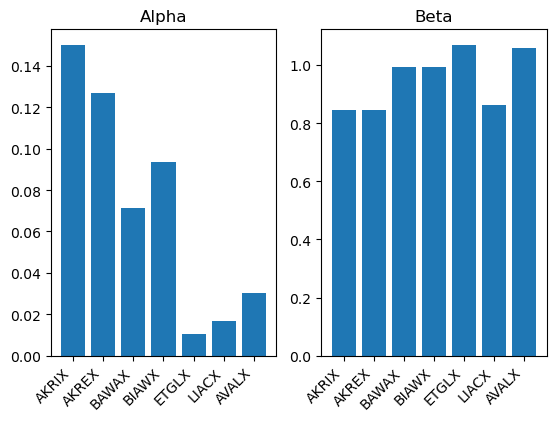

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.bar(pos_names_c, alpha)
ax2.bar(pos_names_c, pos_beta)
fig.autofmt_xdate(rotation=45)
ax1.set_title('Alpha')
ax2.set_title('Beta')
plt.show()

## Benchmark

In [6]:
alpha=[]
pos_beta=[]
pos_corr=[]
for ticker in pos_bench_data:
    strat = [i for i in dict_pos_bench if ticker['ticker'].iloc[0] in dict_pos_bench[i]]
    # strat = name_to_num[index_name[0]]
    strat = strat[0]

    start_date = ff_df['date'][0] if ff_df['date'][0] > ticker['date'][1] else ticker['date'][1]
    start_date = start_date if start_date > us_index[strat]['Date'][1] else us_index[strat]['Date'][1]
    end_date = ticker['date'].iloc[-1]
    result = capm_index(ticker, ff_df, us_index[strat], start_date, end_date)
    if result == None:
        continue
    pos_corr.append(corr_index(ticker, us_index[strat], start_date, end_date))
    alpha.append(result['const'])
    pos_beta.append(result['beta'])

pos_names_bench = [item for sublist in list(dict_pos_bench.values()) for item in sublist]
print(f'Benchmark CAPM positive alpha: {pos_names_bench}')

print(f'Average positive beta: {np.mean(pos_beta)} with a stdev of {np.std(pos_beta)}')

neg_beta = (np.sum([item for sublist in ind_idx_betas_c for item in sublist]) - len(pos_names_bench) * np.mean(pos_beta) 
            )/ (len([item for sublist in ind_idx_alphas_c for item in sublist]) - len(pos_names_bench))
print(f'Average negative beta: {neg_beta} with a stdev of {np.std([item for sublist in ind_idx_betas_c for item in sublist])}')

print(f'Average positive correlation: {np.mean(pos_corr)} w/ stdev of {np.std(pos_corr)}')
print(f'Average negative correlation: {np.mean([item for sublist in ind_corr for item in sublist])} w/ stdev of {np.std([item for sublist in ind_corr for item in sublist])}')

Benchmark CAPM positive alpha: ['NPNCX', 'AKRIX', 'AKREX', 'FTVSX', 'FTVNX', 'TMPIX', 'ETGLX', 'LCLAX', 'VMACX', 'VMCCX', 'VIMCX', 'VKSIX', 'SZCIX', 'RPMFX', 'NBGNX', 'NBGEX', 'FKAIX', 'WGROX', 'BCSIX', 'PSCCX', 'PNSCX', 'WBSIX', 'DNSMX', 'DVSMX', 'OBSIX']
Average positive beta: 0.8902094004177568 with a stdev of 0.12806420574435173
Average negative beta: 0.9527566727808111 with a stdev of 0.10023166360179182
Average positive correlation: 0.8608699499777847 w/ stdev of 0.15497777608486296
Average negative correlation: 0.8843788999748504 w/ stdev of 0.07190827462791687


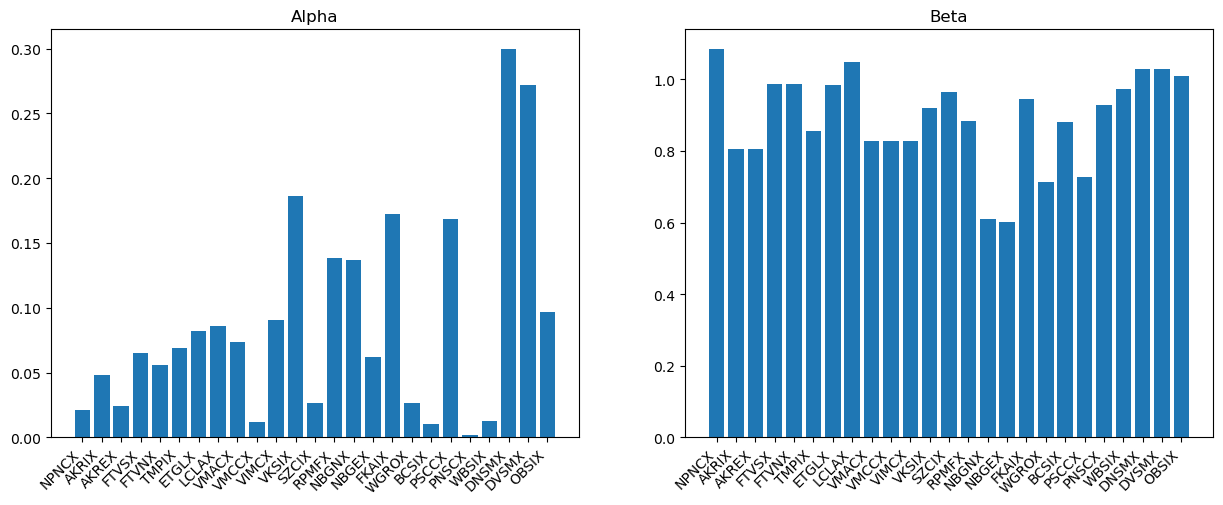

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
ax1.bar(pos_names_bench, alpha)
ax2.bar(pos_names_bench, pos_beta)
fig.autofmt_xdate(rotation=45)
ax1.set_title('Alpha')
ax2.set_title('Beta')
plt.show()

## FF 5

In [8]:
flat = lambda arr: [item for sublist in arr for item in sublist]

In [9]:
pos_alpha = []
pos_beta = []
pos_smb = []
pos_hml = []
pos_rmw = []
pos_cma = []
for ticker in pos_5_data:
    start_date = ff_df['date'][0] if ff_df['date'][0] > ticker['date'][1] else ticker['date'][1]
    end_date = ticker['date'].iloc[-1]
    result = reg_date_range(ticker, ff_df, ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA'], start_date, end_date)
    if result == None:
        continue
    pos_alpha.append(result['const'])
    pos_beta.append(result['Mkt-RF'])
    pos_smb.append(result['SMB'])
    pos_hml.append(result['HML'])
    pos_rmw.append(result['RMW'])
    pos_cma.append(result['CMA'])

pos_names_5 = flat(list(dict_pos_5.values()))

print(f'5-factor positive alpha: {pos_names_5}')

print(f'Average positive beta: {np.mean(pos_beta)} with a stdev of {np.std(pos_beta)}')
print(f'Average negative beta: {np.mean(flat(ind_betas_5))} with a stdev of {np.std(flat(ind_betas_5))}')

print('\n')
print(f'Average positive SMB: {np.mean(pos_smb)} with a stdev of {np.std(pos_smb)}')
print(f'Average negative SMB: {np.mean(flat(ind_smbs_5))} with a stdev of {np.std(flat(ind_smbs_5))}')

print('\n')
print(f'Average positive HML: {np.mean(pos_hml)} with a stdev of {np.std(pos_hml)}')
print(f'Average negative HML: {np.mean(flat(ind_hmls_5))} with a stdev of {np.std(flat(ind_hmls_5))}')

print('\n')
print(f'Average positive RMW: {np.mean(pos_rmw)} with a stdev of {np.std(pos_rmw)}')
print(f'Average negative RMW: {np.mean(flat(ind_rmws_5))} with a stdev of {np.std(flat(ind_rmws_5))}')

print('\n')
print(f'Average positive CMA: {np.mean(pos_cma)} with a stdev of {np.std(pos_cma)}')
print(f'Average negative CMA: {np.mean(flat(ind_cmas_5))} with a stdev of {np.std(flat(ind_cmas_5))}')

5-factor positive alpha: ['HCACX', 'VHIAX', 'AKRIX', 'AKREX', 'BAWAX', 'BIAWX', 'JAENX', 'CMGIX', 'ETAGX', 'ETILX', 'ETGLX', 'LCLAX', 'LIACX', 'VKSIX', 'FKAIX', 'DNSMX', 'DVSMX']
Average positive beta: 0.9547840464051474 with a stdev of 0.10396356416006396
Average negative beta: 0.9722204116495833 with a stdev of 0.08622597445864852


Average positive SMB: 0.2857213129917924 with a stdev of 0.3065012928836452
Average negative SMB: 0.2916587461156265 with a stdev of 0.32587989126047273


Average positive HML: -0.1876740937985166 with a stdev of 0.09768738114541758
Average negative HML: 0.08740101955643372 with a stdev of 0.24069500628910792


Average positive RMW: -0.23090032511314731 with a stdev of 0.25154269278845676
Average negative RMW: 0.033812125776445365 with a stdev of 0.19421166932431388


Average positive CMA: -0.3085725213380305 with a stdev of 0.22277886913340347
Average negative CMA: -0.1372780132666149 with a stdev of 0.18696367691464202


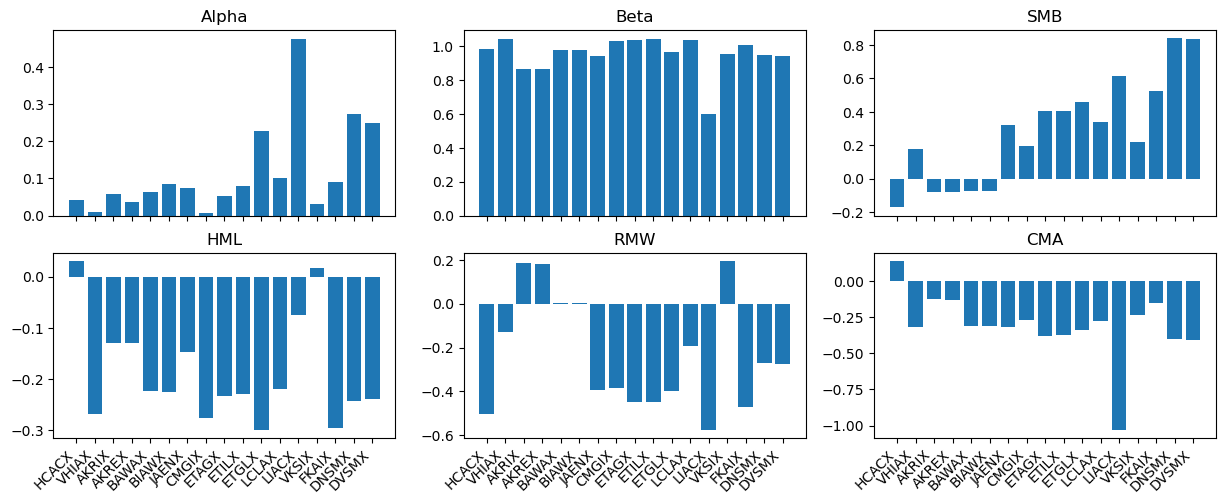

In [10]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(15,6))
ax1.bar(pos_names_5, pos_alpha)
ax1.set_title('Alpha')
ax2.bar(pos_names_5, pos_beta)
ax2.set_title('Beta')
ax3.bar(pos_names_5, pos_smb)
ax3.set_title('SMB')
ax4.bar(pos_names_5, pos_hml)
ax4.set_title('HML')
ax5.bar(pos_names_5, pos_rmw)
ax5.set_title('RMW')
ax6.bar(pos_names_5, pos_cma)
ax6.set_title('CMA')
fig.autofmt_xdate(rotation=45)
plt.show()